<a href="https://colab.research.google.com/github/aaa-aashna/iris-classification-ml-basics/blob/main/ML_AI_Foundations_Section2_Lab3_Aashna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear vs Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
SEED = 42
np.random.seed(SEED)


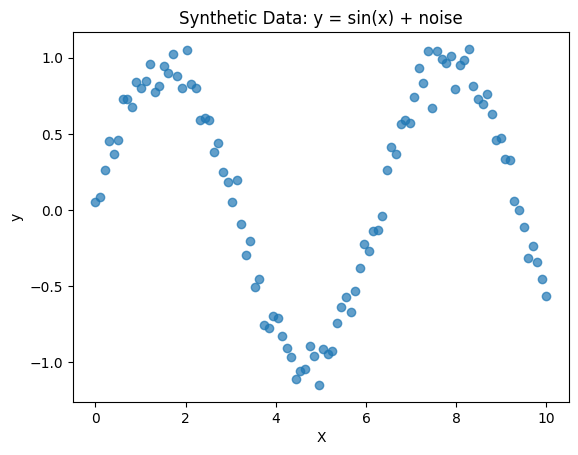

In [2]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)
plt.scatter(X, y, alpha=0.7)
plt.title("Synthetic Data: y = sin(x) + noise")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Degree 1 → MSE = 945.829, R² = 0.896


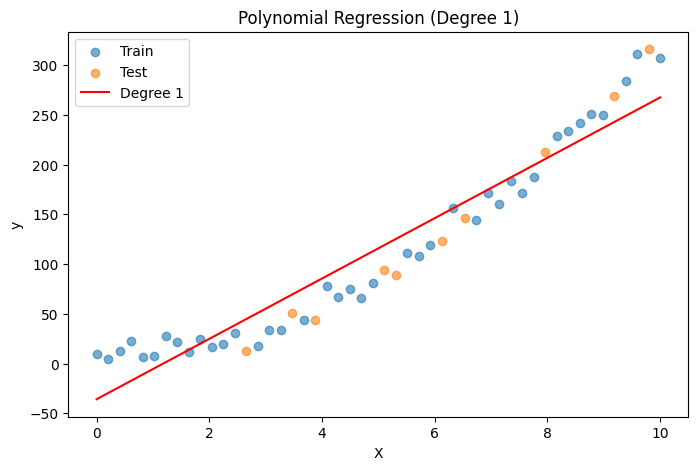

Degree 3 → MSE = 67.780, R² = 0.993


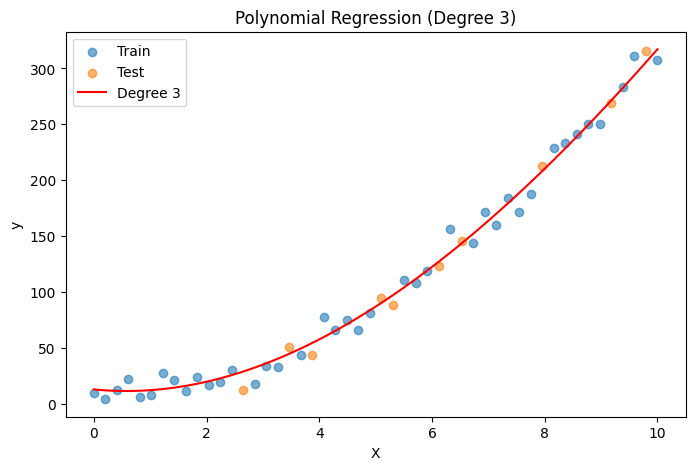

Degree 6 → MSE = 68.860, R² = 0.992


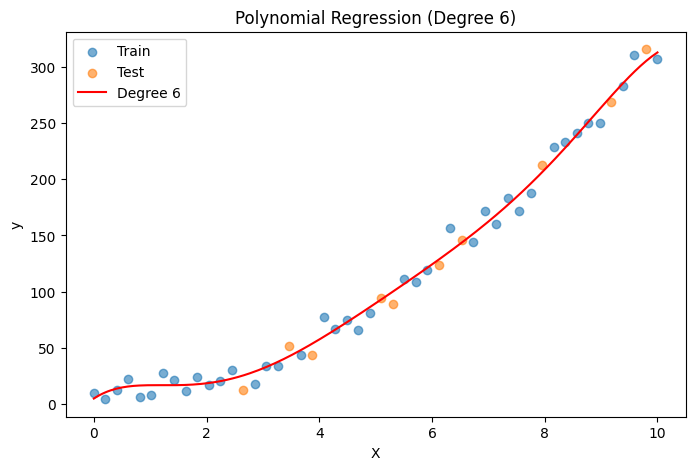

In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Sample data (remove this if you already have X, y)
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X**2 + 2 * X + 5 + np.random.randn(50, 1) * 10
y = y.ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


def poly_regression(degree):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ])

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree} → MSE = {mse:.3f}, R² = {r2:.3f}")

    # Plotting
    X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    y_range_pred = model.predict(X_range)

    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, alpha=0.6, label="Train")
    plt.scatter(X_test, y_test, alpha=0.6, label="Test")
    plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree}")
    plt.legend()
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()


# Run for different degrees
poly_regression(1)
poly_regression(3)
poly_regression(6)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=SEED
)

Linear Regression:
MSE: 0.5516558024470817
R²: -0.09816746609870752


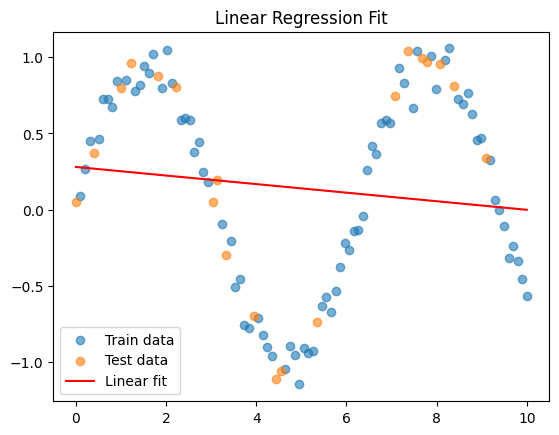

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))
# Plot
plt.scatter(X_train, y_train, label="Train data", alpha=0.6)
plt.scatter(X_test, y_test, label="Test data", alpha=0.6)
plt.plot(X, lin_reg.predict(X), color="red", label="Linear fit")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()


This function implements polynomial regression using a pipeline that generates polynomial features, scales them, fits a linear regression model, evaluates performance using MSE and R², and visualizes the fitted curve.

In [9]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = []

for d in [1, 3, 5, 10]:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ])

    # Train model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Store results
    results.append({
        "Degree": d,
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    })

# Create DataFrame
df_results = pd.DataFrame(results)
print(df_results)


   Degree         MSE        R²
0       1  945.828635  0.896362
1       3   67.780418  0.992573
2       5   64.885515  0.992890
3      10   66.711370  0.992690


Aim

Compare Linear Regression vs Polynomial Regression

Understand underfitting and overfitting

Evaluate models using MSE and R²

Dataset

Synthetic data:
y = sin(x) + noise

Non-linear relationship → good for testing model complexity

Tools Used

Python libraries: numpy, matplotlib, pandas

Scikit-learn:

LinearRegression

PolynomialFeatures

Pipeline

StandardScaler

train_test_split

mean_squared_error, r2_score

Steps Overview

Generate sinusoidal dataset with noise

Split data into 80% train / 20% test

Train Linear Regression

Train Polynomial Regression with degrees 3, 5, 10

Compare performance using MSE & R²

Observe bias–variance tradeoff

Linear Regression

Fits a straight line

Fails to capture sine pattern

Results:

High bias

Underfitting

Poor R² score
**bold text**
 Conclusion: Too simple for non-linear data

Polynomial Regression
Degree	Behavior	Result
3	Slight curve	Better than linear, still biased
5	Smooth curve	Best generalization
10	Very wiggly	Overfits training data
Key Metrics

MSE (Mean Squared Error)
→ Lower = better

R² Score
→ Closer to 1 = better fit

Underfitting

Model too simple

High training & test error

Example: Linear regression on sine data

Overfitting

Model too complex

Very low training error

High test error

Example: Polynomial degree 10

Best Model

Polynomial degree 5

Balance between bias and variance

Best test performance